In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
orders=pd.read_csv('/content/orders.csv')
temp_orders=orders
items=pd.read_csv('/content/items.csv')
ingredients=pd.read_csv('/content/ingredients.csv')
temp_ing=ingredients
inventory=pd.read_csv('/content/inventory.csv')
recipe=pd.read_csv('/content/recipe.csv')
temp_item=items

In [ ]:
orders['item_id'].unique()
orders['item_id'] = orders['item_id'].replace('It0010', 'It010')
orders['item_id'].unique()

array(['It008', 'It014', 'It019', 'It024', 'It001', 'It016', 'It005',
       'It020', 'It006', 'It018', 'It023', 'It011', 'It003', 'It007',
       'It009', 'It021', 'It012', 'It022', 'It004', 'It002', 'It017',
       'It010', 'It015', 'It013', 'It028', 'It027', 'It026', 'It025'],
      dtype=object)

In [ ]:
items['item_size'].fillna('Medium',inplace=True)
items['item_size'].unique()


<ipython-input-4-9c622a202b67>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  items['item_size'].fillna('Medium',inplace=True)


array(['Medium', 'Large'], dtype=object)

In [ ]:
orders['in_or_out']=orders['in_or_out'].replace(' ','in')
orders['in_or_out'].value_counts()

,count
in_or_out,
in,261
out,228


{'Cappuccino': 3.75, 'Latte': 3.75, 'Flat White': 3.15, 'Caramel Macchiato': 4.6, 'Espresso': 2.15, 'Mocha': 4.6, 'White Mocha': 4.7, 'Hot Chocolate': 4.6, 'Cold Coffee': 3.75, 'Cold Mocha': 4.6, 'Iced Tea': 3.55, 'Lemonade': 3.75, 'Sandwich Ham&Cheese': 5.6, 'Sandwich Salami&Mozzarella': 5.5}


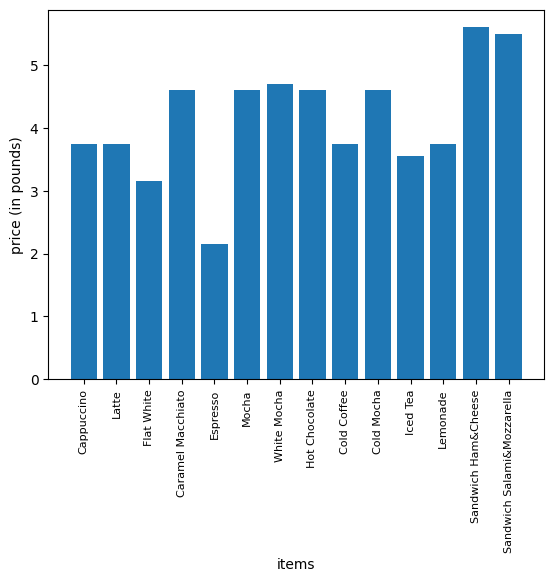

In [ ]:
item_names=list(items['item_name'])
item_price=list(items['item_price'])
plt.ylabel('price (in pounds)')
plt.xlabel('items')
plt.xticks(rotation=90)
plt.xticks(fontsize=8)

plt.bar(item_names,item_price)

item_price_info={}
for i in range(len(item_names)):
  item_price_info[item_names[i]]=item_price[i]
print(item_price_info)

{'Cappuccino': 3.75, 'Latte': 3.75, 'Flat White': 3.15, 'Caramel Macchiato': 4.6, 'Espresso': 2.15, 'Mocha': 4.6, 'White Mocha': 4.7, 'Hot Chocolate': 4.6, 'Cold Coffee': 3.75, 'Cold Mocha': 4.6, 'Iced Tea': 3.55, 'Lemonade': 3.75, 'Sandwich Ham&Cheese': 5.6, 'Sandwich Salami&Mozzarella': 5.5}


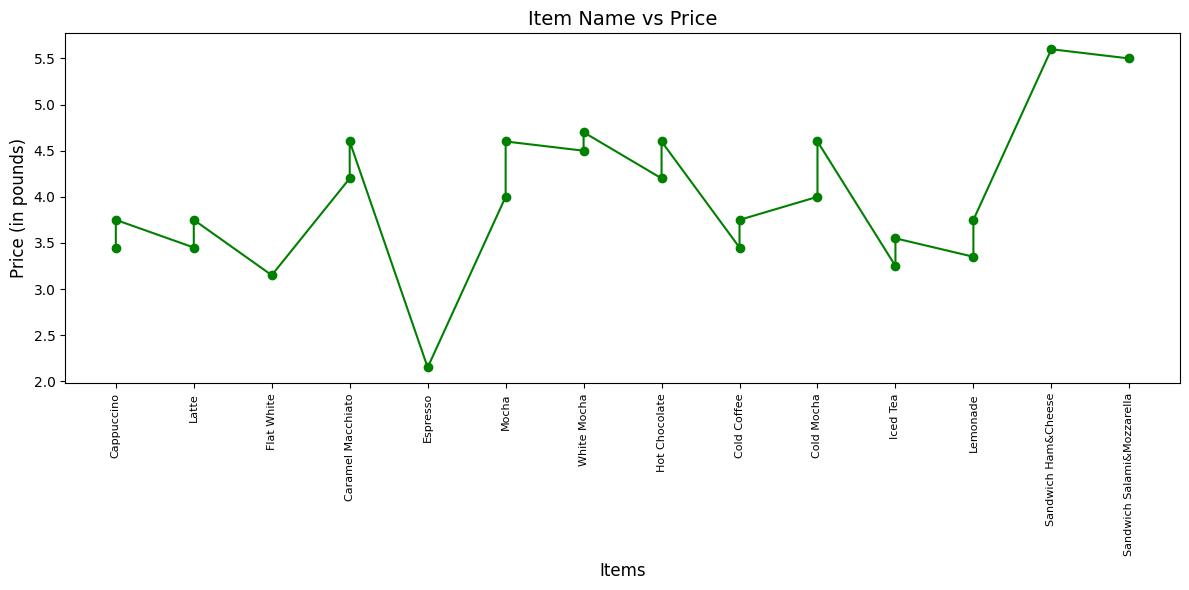

In [ ]:


# Creating item price dictionary
item_price_info = {item_names[i]: item_price[i] for i in range(len(item_names))}
print(item_price_info)

# Plotting the line plot
plt.figure(figsize=(12, 6))
plt.plot(item_names, item_price, marker='o', linestyle='-', color='green')
plt.ylabel('Price (in pounds)', fontsize=12)
plt.xlabel('Items', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.title('Item Name vs Price', fontsize=14)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
orders=pd.merge(orders,items)

{'Cappuccino': 40,
 'Latte': 38,
 'Flat White': 27,
 'Caramel Macchiato': 37,
 'Espresso': 19,
 'Mocha': 39,
 'White Mocha': 43,
 'Hot Chocolate': 35,
 'Cold Coffee': 31,
 'Cold Mocha': 47,
 'Iced Tea': 36,
 'Lemonade': 40,
 'Sandwich Ham&Cheese': 16,
 'Sandwich Salami&Mozzarella': 19}

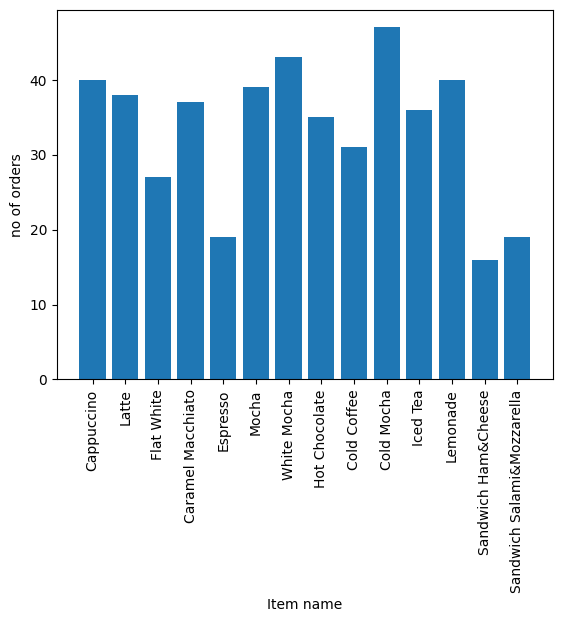

In [ ]:
## Analysing the frequency of orders of each of the items
order_frequencies=[]
for item in item_names:
  order_frequencies.append(orders['item_name'].value_counts()[item])
plt.bar(item_names,order_frequencies)
plt.xticks(rotation=90)
plt.xlabel('Item name')
plt.ylabel('no of orders')

item_freq_info={}
for i in range(len(item_names)):
  item_freq_info[item_names[i]]=order_frequencies[i]
item_freq_info

In [ ]:
## revenue generated by each beverage so far
rev=[]
for key,val in item_price_info.items():
  rev.append(val*item_freq_info[key])


revenue_data={
    'item_name':list(item_freq_info.keys()),
    'order_freq':list(item_freq_info.values()),
    'price per quantity (£)':list(item_price_info.values()),
    'revenue (£)':rev

}

revenue_info=pd.DataFrame(revenue_data)
revenue_info=revenue_info.sort_values(by=['revenue (£)'],ascending=False)
revenue_info

,item_name,order_freq,price per quantity (£),revenue (£)
9,Cold Mocha,47,4.60,216.20
6,White Mocha,43,4.70,202.10
5,Mocha,39,4.60,179.40
3,Caramel Macchiato,37,4.60,170.20
7,Hot Chocolate,35,4.60,161.00
0,Cappuccino,40,3.75,150.00
11,Lemonade,40,3.75,150.00
1,Latte,38,3.75,142.50
10,Iced Tea,36,3.55,127.80
8,Cold Coffee,31,3.75,116.25


<ipython-input-11-602fbfaf1724>:5: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x=revenue_info['item_name'], y=revenue_info['revenue (£)'], color='blue', markers='o', linestyles='-', scale=1.5)


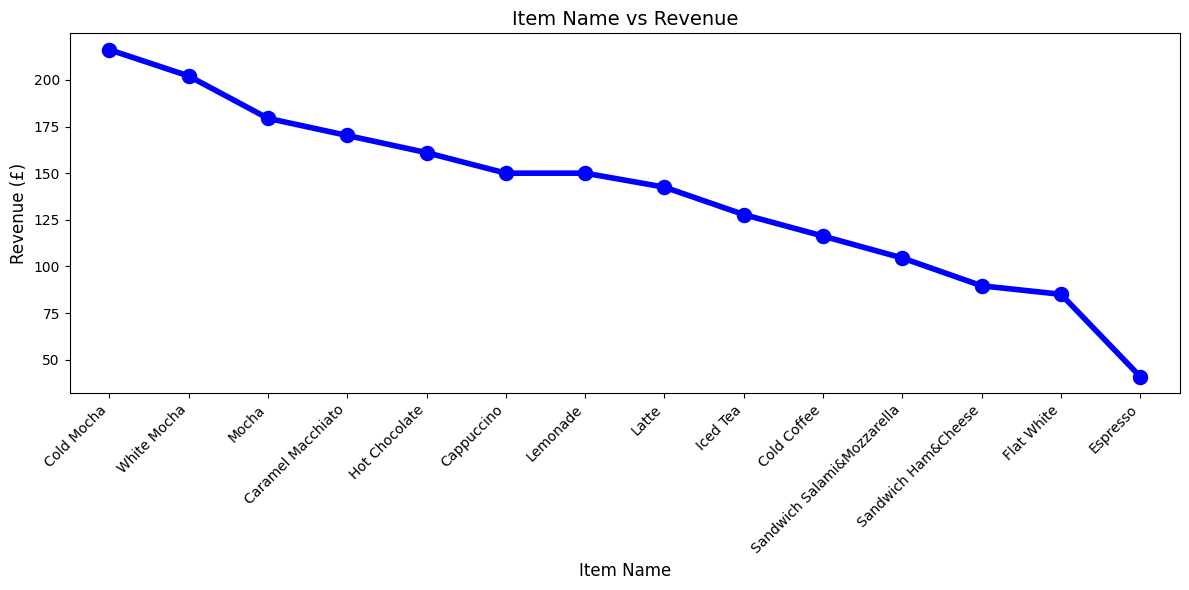

In [ ]:
import seaborn as sns

# Plot using a point plot for better clarity
plt.figure(figsize=(12, 6))
sns.pointplot(x=revenue_info['item_name'], y=revenue_info['revenue (£)'], color='blue', markers='o', linestyles='-', scale=1.5)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Item Name', fontsize=12)
plt.ylabel('Revenue (£)', fontsize=12)
plt.title('Item Name vs Revenue', fontsize=14)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
## comparing order in and order out seperately

order_in=orders.loc[orders['in_or_out']=='in']
order_out=orders.loc[orders['in_or_out']=='out']
order_in_freq=order_in['item_name'].value_counts()
order_out_freq=order_out['item_name'].value_counts()

In [ ]:
# print(order_in_freq)
# print("\n\n\n")
# print(order_out_freq)

We find that for order out: mocha, cold mocha,cappuccino,iced tea and caramel macchiato perform the best

for order in:white mocha,cold mocha,lemonade,hot chocolate and latte perform the best


In [ ]:
## Analysis of the ingredients used in Order out

pop_items_out=['Mocha','Cold Mocha','Cappuccino','Iced Tea','Caramel Macchiato']
pop_items_in=['White Mocha','Cold Mocha','Lemonade','Hot Chocolate','Latte']



item_recipe_out={}
item_recipe_in={}

for item in pop_items_out:
  item_recipe_out[item]=[]
for item in pop_items_in:
  item_recipe_in[item]=[]

item_recipe_out['Mocha']=['Espresso beans','Whole Milk']
item_recipe_out['Cold Mocha']=['Espresso beans','Whole Milk','Barista chocolate syrup']
item_recipe_out['Cappuccino']=['Espresso beans','Whole Milk']
item_recipe_out['Iced Tea']=['Salami','Sugar','Black Tea']
item_recipe_out['Caramel Macchiato']=['Espresso beans','Whole Milk','Barista caramel sauce']


item_recipe_in['White Mocha']=['Espresso beans','Whole Milk','Barista white chocolate syrup']
item_recipe_in['Cold Mocha']=['Espresso beans','Whole Milk','Barista chocolate syrup']
item_recipe_in['Lemonade']=['Sugar','Lemons']
item_recipe_in['Hot Chocolate']=['Cocoa powder','Chocolate','Whole Milk','Whipped cream']
item_recipe_in['Latte']=['Espresso beans','Whole Milk']

all_ing=[]

for items in item_recipe_out.values():
  for temp in items:
    all_ing.append(temp)


for items in item_recipe_in.values():
  for temp in items:
    all_ing.append(temp)


all_ing=list(set(all_ing))
print(all_ing)

['Lemons', 'Whipped cream', 'Barista white chocolate syrup', 'Cocoa powder', 'Barista chocolate syrup', 'Chocolate', 'Barista caramel sauce', 'Whole Milk', 'Espresso beans', 'Salami', 'Sugar', 'Black Tea']


In [ ]:
## occurence of ingredients across all the items

popular_ing={}
for ing in all_ing:
  ct=0
  for k,v in item_recipe_in.items():
    if ing in v:
      ct+=1
  for k,v in item_recipe_out.items():
    if ing in v:
      ct+=1

  if ct>0:
    popular_ing[ing]=ct


print(popular_ing)


{'Lemons': 1, 'Whipped cream': 1, 'Barista white chocolate syrup': 1, 'Cocoa powder': 1, 'Barista chocolate syrup': 2, 'Chocolate': 1, 'Barista caramel sauce': 1, 'Whole Milk': 8, 'Espresso beans': 7, 'Salami': 1, 'Sugar': 2, 'Black Tea': 1}


9


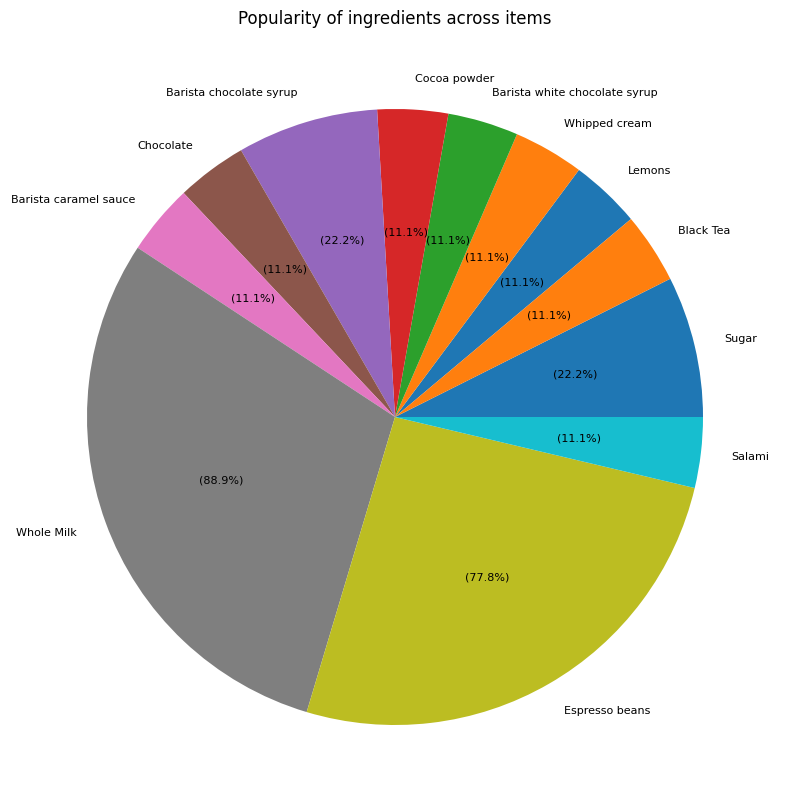

In [ ]:
total_items = len(item_recipe_in)+len(item_recipe_out)-1
print(total_items)
# Function to calculate percentage relative to total items

def custom_autopct(pct):
    # Calculate the number of occurrences represented by the pie slice
    count = int(round(pct * sum(popular_ing.values()) / 100.0))
    # Calculate the percentage relative to the total items
    percentage = (count / total_items) * 100
    return f'({percentage:.1f}%)'

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(
    popular_ing.values(),
    labels=popular_ing.keys(),
    autopct=custom_autopct,
    startangle=40,
    textprops={'fontsize': 8})


# Add a title
plt.title('Popularity of ingredients across items')

# Show the plot
plt.show()

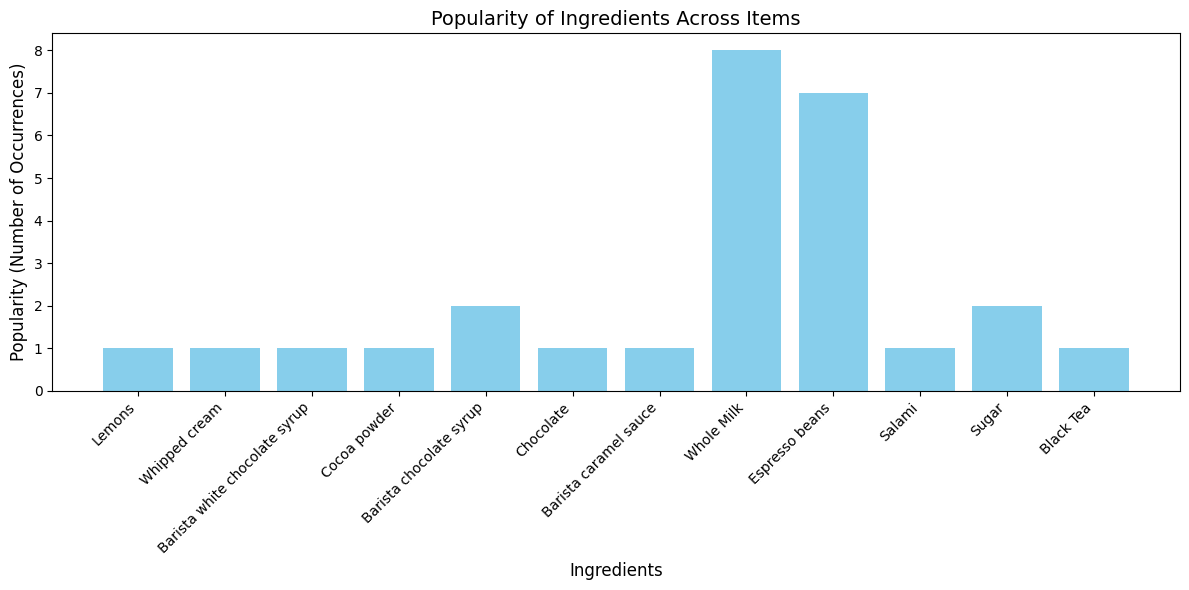

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'popular_ing' is your dictionary of ingredient popularity
ingredients = list(popular_ing.keys())
popularity = list(popular_ing.values())

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.bar(ingredients, popularity, color='skyblue')  # Create the bar chart (histogram)
plt.xlabel('Ingredients', fontsize=12)
plt.ylabel('Popularity (Number of Occurrences)', fontsize=12)
plt.title('Popularity of Ingredients Across Items', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

We find that Espresso beans and Whole milk are predominant. However these seem to be basic ingredients that are needed for any beverage. The other ingredients are the ones that are making the difference. Hence it is a good idea to innovate and try and come up with new types of beverages that could be prepared from these ingredients.

Also for both order_in and order_out items, Salami&Mozerella sandwich and Ham&Cheese sandwich are not performing well. Both of them have not been ordered much by the customers thus showing a sense of dissatisfaction.





Possible Solutions:


Offer the sandwich and one of the beverages, say Caramel Machiato as a combo at a discount for a fixed time period. The shop can experiment with this combo and see if the sandwich sales show an upward trend. If yes, make the combo a permanent part of the menu.




In [ ]:
print(order_in_freq)

item_name
White Mocha                   23
Cold Mocha                    22
Lemonade                      21
Hot Chocolate                 20
Latte                         20
Cappuccino                    19
Caramel Macchiato             17
Cold Coffee                   16
Mocha                         15
Sandwich Salami&Mozzarella    14
Iced Tea                      13
Sandwich Ham&Cheese           12
Espresso                      11
Flat White                     8
Name: count, dtype: int64


In [ ]:
print(order_out_freq)

item_name
Mocha                         23
Cold Mocha                    22
Cappuccino                    20
Iced Tea                      19
Caramel Macchiato             19
Flat White                    18
Latte                         15
White Mocha                   15
Lemonade                      14
Cold Coffee                   12
Hot Chocolate                 11
Espresso                       8
Sandwich Salami&Mozzarella     4
Sandwich Ham&Cheese            4
Name: count, dtype: int64


In [ ]:
## experimenting with combo of sandwich Salami and caramel Machiato
machiato_salami_orders=orders.loc[(orders['item_name']=='Sandwich Salami&Mozzarella') | (orders['item_name']=='Caramel Macchiato')  ]
print(len(machiato_salami_orders))


salami_orders=orders.loc[(orders['item_name']=='Sandwich Salami&Mozzarella') ]
machiato_orders=orders.loc[(orders['item_name']=='Caramel Macchiato')]

56


In [ ]:
# salami_orders

In [ ]:
# machiato_orders

In [ ]:
print(len(salami_orders))
print(len(machiato_orders))

19
37


In [ ]:
## 1 week data available... extrapolate to 1 month
## 1 salami&mozerella sandwich costs £5.5 and 1 caramel macchiato costs £4.6
## let us fix the price of the combo at £7 pounds to start with

df_salami=salami_orders
df_machiato=machiato_orders
df_machiato['item_size'] = df_machiato['item_size'].replace('Medium', 'Large')
df_machiato['item_price'] = df_machiato['item_price'].replace(4.2,4.6)

# df_machiato

<ipython-input-22-27f3bdca0950>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_machiato['item_size'] = df_machiato['item_size'].replace('Medium', 'Large')
<ipython-input-22-27f3bdca0950>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_machiato['item_price'] = df_machiato['item_price'].replace(4.2,4.6)


In [ ]:
## assuming salami and caramel macchiato is sold as a combo... we find that in the time between 12 feb 2024 and 17 feb 2024, they are sold 15 times together
temp={
    'date':['2024-02-12','2024-02-13','2024-02-14','2024-02-15','2024-02-16','2024-02-17'],
    'sales':[3,2,2,3,2,3],
    'revenue':[22.5,15.0,15.0,22.5,15.0,22.5]
}

combo=pd.DataFrame(temp)
combo

,date,sales,revenue
0,2024-02-12,3,22.5
1,2024-02-13,2,15.0
2,2024-02-14,2,15.0
3,2024-02-15,3,22.5
4,2024-02-16,2,15.0
5,2024-02-17,3,22.5


In [ ]:
from datetime import datetime, timedelta

start_date = datetime(2024, 2, 18)
end_date = datetime(2024, 3, 13)
date_range = pd.date_range(start=start_date, end=end_date)

# Generate random sales values
np.random.seed(0)  # For reproducibility
sales_values = np.random.randint(1, 5, size=len(date_range))

# Create DataFrame for new data
df_new = pd.DataFrame({
    'date': date_range,
    'sales': sales_values,
    'revenue': sales_values * 7.50  # Example revenue calculation
})

df_combined = pd.concat([combo, df_new], ignore_index=True)
df_combined

,date,sales,revenue
0,2024-02-12,3,22.5
1,2024-02-13,2,15.0
2,2024-02-14,2,15.0
3,2024-02-15,3,22.5
4,2024-02-16,2,15.0
5,2024-02-17,3,22.5
6,2024-02-18 00:00:00,1,7.5
7,2024-02-19 00:00:00,4,30.0
8,2024-02-20 00:00:00,2,15.0
9,2024-02-21 00:00:00,1,7.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


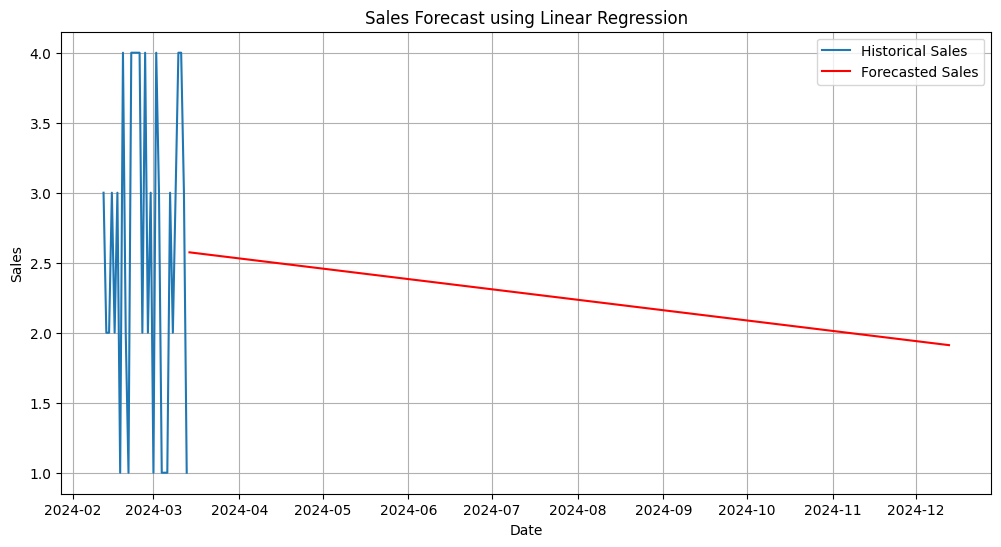

<bound method BaseEstimator.get_params of LinearRegression()>


In [ ]:
## Forecasting the performance of the combo for the time period 14 march to 13 april


## Using a simple Linear regression Model

from sklearn.linear_model import LinearRegression

df_combined['date'] = pd.to_datetime(df_combined['date'])

df_combined['date_ordinal'] = df_combined['date'].map(pd.Timestamp.toordinal)
X = df_combined[['date_ordinal']]
y = df_combined['sales']

# Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)
forecast_start = pd.to_datetime('2024-03-14')
forecast_end = pd.to_datetime('2024-12-13')
forecast_dates = pd.date_range(start=forecast_start, end=forecast_end)
forecast_dates_ordinal = forecast_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
forecast = model.predict(forecast_dates_ordinal)

# Prepare forecast DataFrame
df_forecast = pd.DataFrame({
    'date': forecast_dates,
    'forecast': forecast
}).set_index('date')

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df_combined['date'], df_combined['sales'], label='Historical Sales')
plt.plot(df_forecast.index, df_forecast['forecast'], label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast using Linear Regression')
plt.legend()
plt.grid(True)
plt.show()
print(model.get_params)


In [ ]:
print(model.intercept_)
print(model.coef_)

1790.3782258064493
[-0.00241935]


In [ ]:
!pip install pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

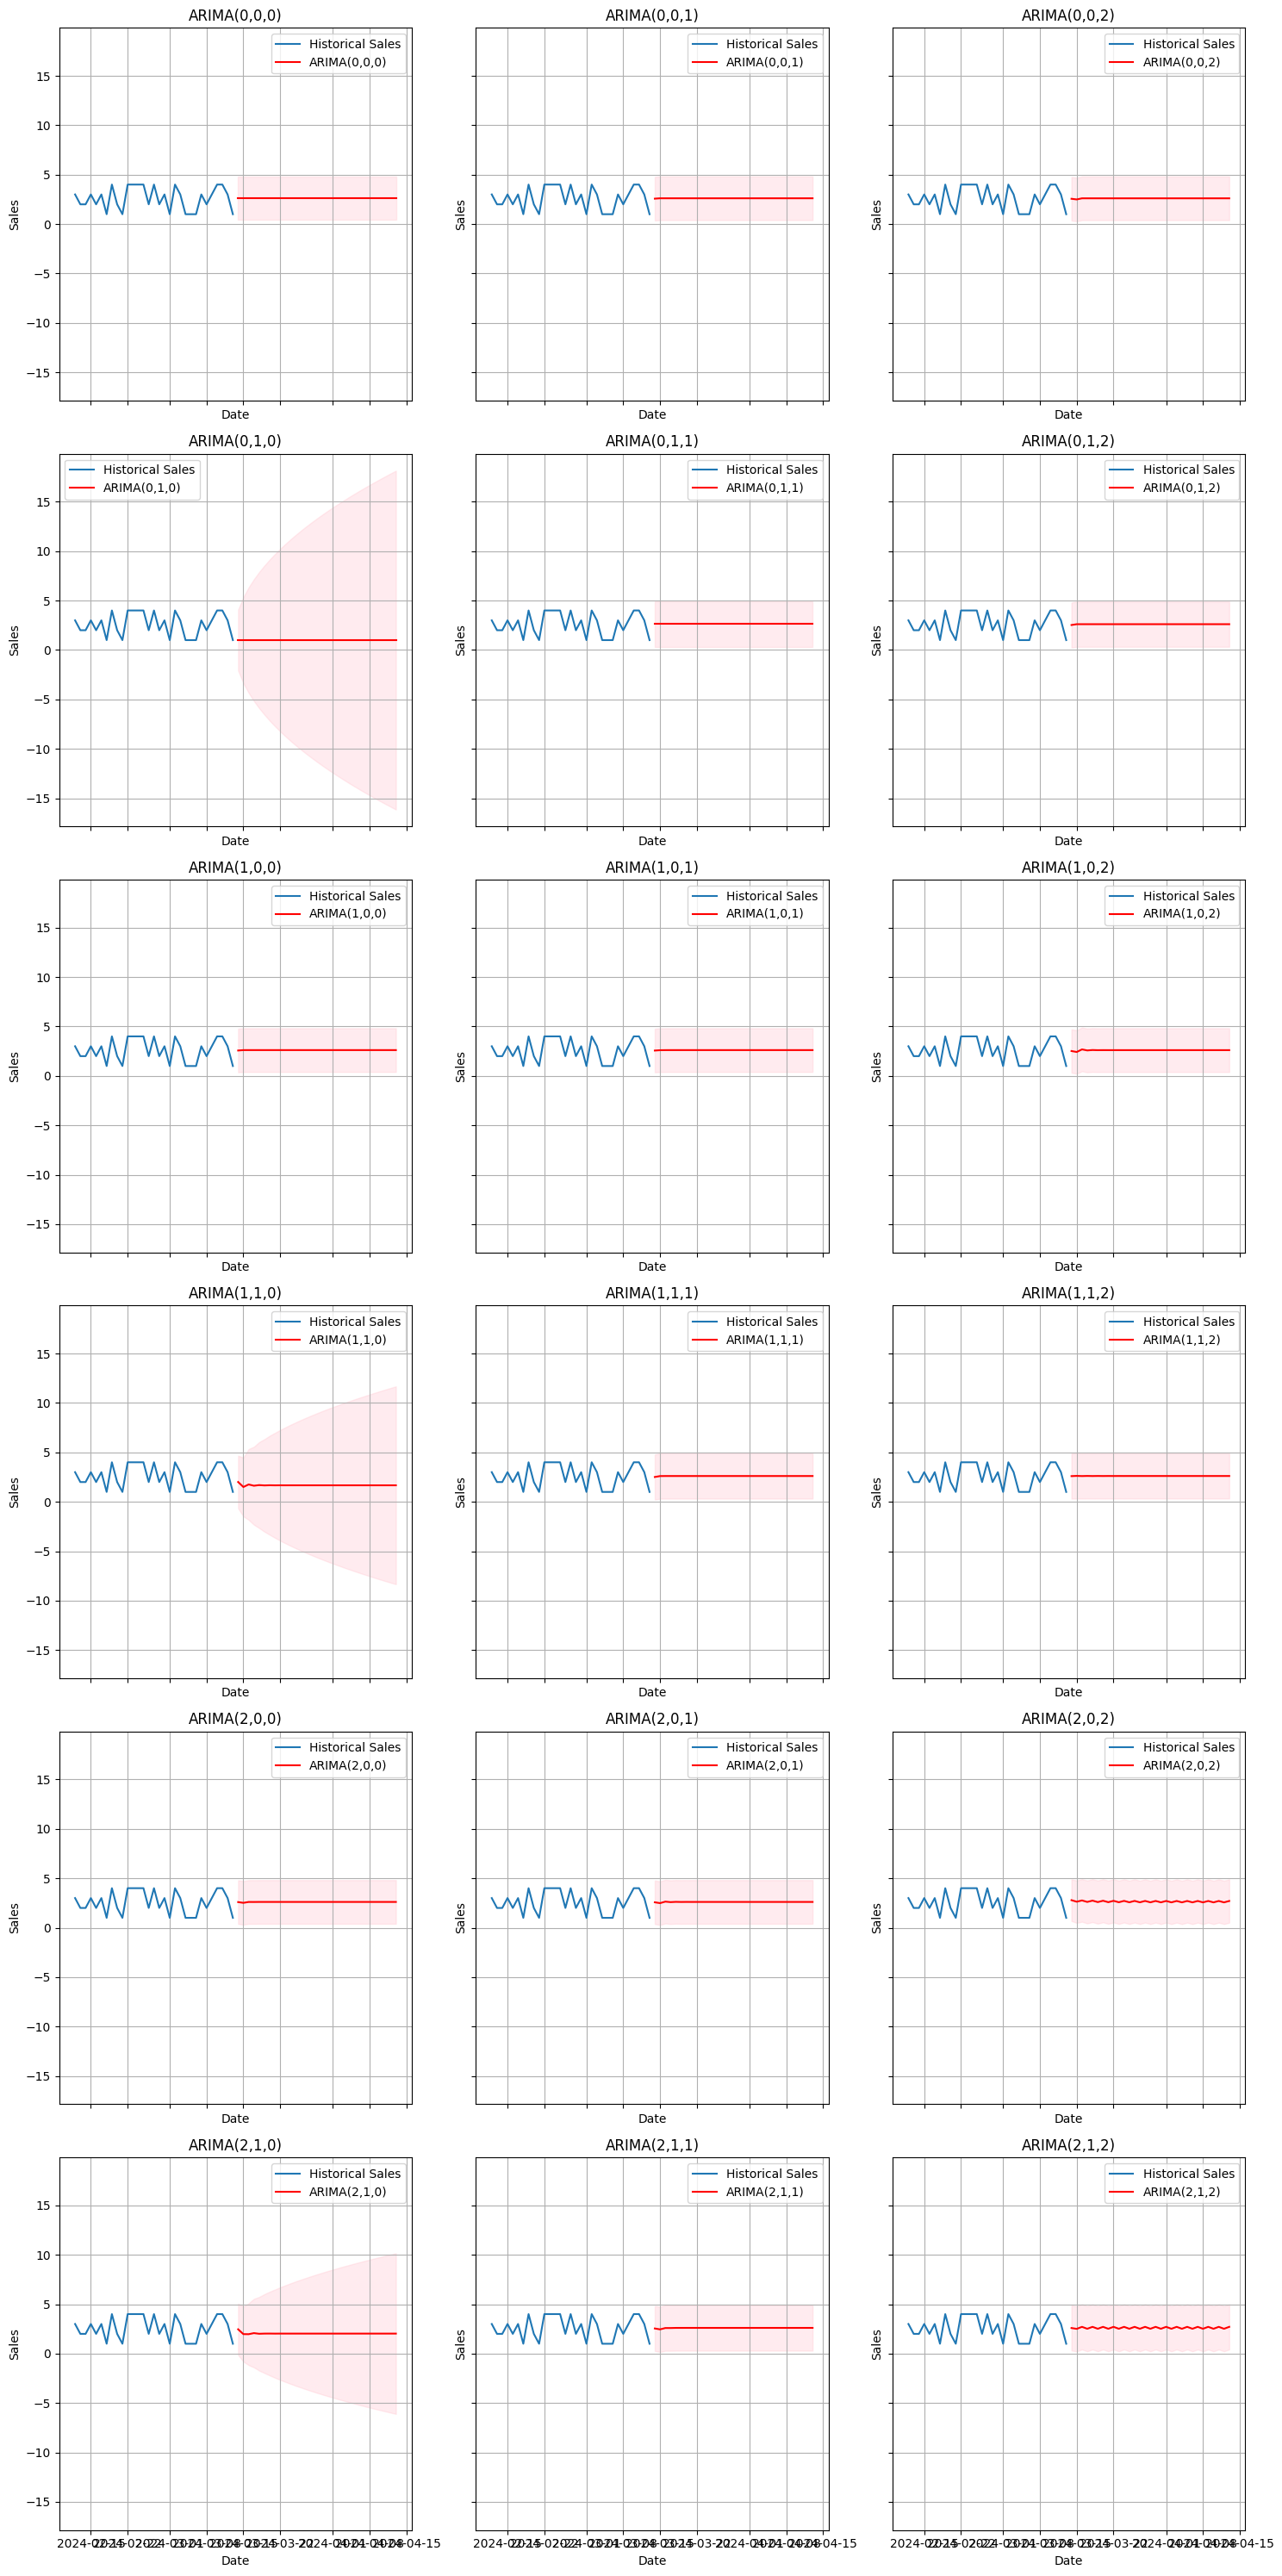

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from itertools import product

# Load and preprocess the data
df_combined['date'] = pd.to_datetime(df_combined['date'])
df_combined = df_combined.set_index('date').sort_index()

# Extract sales as the time series
y = df_combined['sales']

# Define ARIMA parameter ranges for exploration
p_range = range(0, 3)  # Autoregressive terms
d_range = range(0, 2)  # Differencing terms
q_range = range(0, 3)  # Moving average terms

# Forecasting period
forecast_start = pd.to_datetime('2024-03-14')
forecast_end = pd.to_datetime('2024-04-13')
forecast_steps = (forecast_end - forecast_start).days + 1  # Number of days to forecast
forecast_index = pd.date_range(start=forecast_start, end=forecast_end)

# Collect results for subplots
results = []

for p, d, q in product(p_range, d_range, q_range):
    try:
        # Fit ARIMA model
        model = ARIMA(y, order=(p, d, q))
        model_fitted = model.fit()

        # Forecast
        forecast = model_fitted.get_forecast(steps=forecast_steps)
        forecast_mean = forecast.predicted_mean
        forecast_conf_int = forecast.conf_int()

        # Prepare forecast DataFrame
        results.append({
            'p': p, 'd': d, 'q': q,
            'forecast': forecast_mean,
            'lower_ci': forecast_conf_int.iloc[:, 0],
            'upper_ci': forecast_conf_int.iloc[:, 1]
        })

    except Exception as e:
        print(f"ARIMA({p},{d},{q}) failed: {e}")

# Plot all results in a grid
num_models = len(results)
columns = 3  # Number of plots per row
rows = (num_models + columns - 1) // columns

fig, axes = plt.subplots(rows, columns, figsize=(15, 5 * rows), sharex=True, sharey=True)
axes = axes.flatten()

for idx, result in enumerate(results):
    ax = axes[idx]
    ax.plot(y, label='Historical Sales')
    ax.plot(forecast_index, result['forecast'], label=f'ARIMA({result["p"]},{result["d"]},{result["q"]})', color='red')
    ax.fill_between(forecast_index, result['lower_ci'], result['upper_ci'], color='pink', alpha=0.3)
    ax.set_title(f'ARIMA({result["p"]},{result["d"]},{result["q"]})')
    ax.legend()
    ax.grid(True)
    ax.set_xlabel('Date')
    ax.set_ylabel('Sales')

# Hide unused subplots
for ax in axes[len(results):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

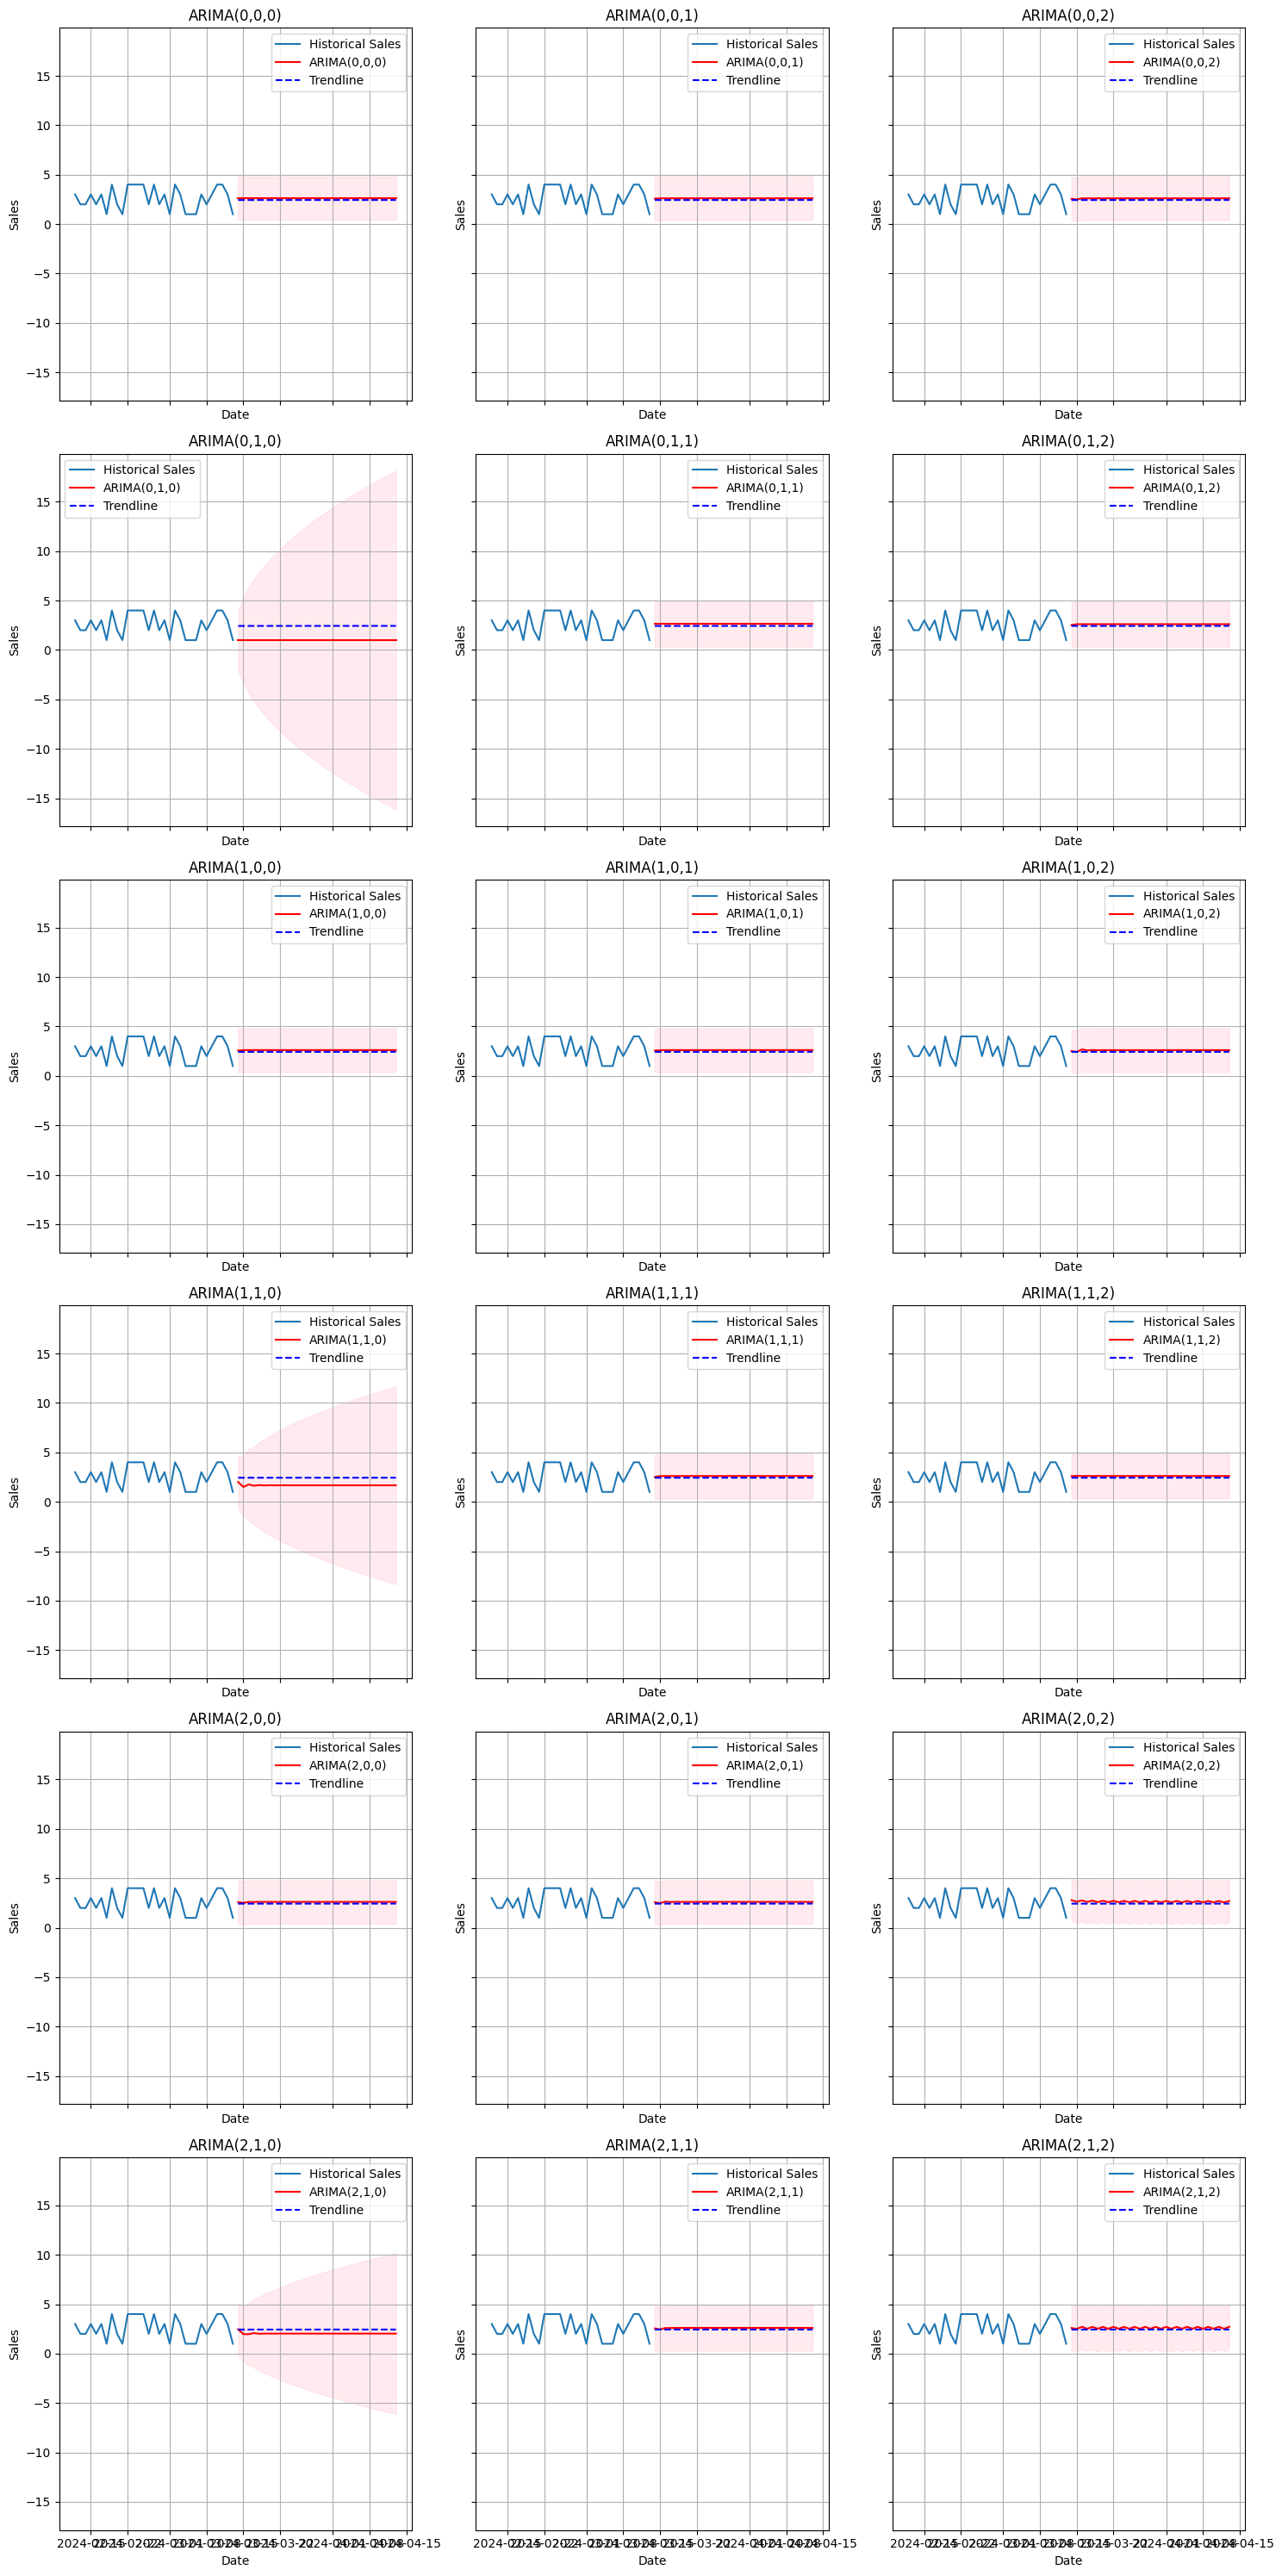

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from itertools import product
from numpy.polynomial.polynomial import Polynomial

# # Load and preprocess the data
# df_combined['date'] = pd.to_datetime(df_combined['date'])
# df_combined = df_combined.set_index('date').sort_index()

# Extract sales as the time series
y = df_combined['sales']

# Define ARIMA parameter ranges for exploration
p_range = range(0, 3)  # Autoregressive terms
d_range = range(0, 2)  # Differencing terms
q_range = range(0, 3)  # Moving average terms

# Forecasting period
forecast_start = pd.to_datetime('2024-03-14')
forecast_end = pd.to_datetime('2024-04-13')
forecast_steps = (forecast_end - forecast_start).days + 1  # Number of days to forecast
forecast_index = pd.date_range(start=forecast_start, end=forecast_end)

# Collect results for subplots
results = []

for p, d, q in product(p_range, d_range, q_range):
    try:
        # Fit ARIMA model
        model = ARIMA(y, order=(p, d, q))
        model_fitted = model.fit()

        # Forecast
        forecast = model_fitted.get_forecast(steps=forecast_steps)
        forecast_mean = forecast.predicted_mean
        forecast_conf_int = forecast.conf_int()

        # Prepare forecast DataFrame
        results.append({
            'p': p, 'd': d, 'q': q,
            'forecast': forecast_mean,
            'lower_ci': forecast_conf_int.iloc[:, 0],
            'upper_ci': forecast_conf_int.iloc[:, 1]
        })

    except Exception as e:
        print(f"ARIMA({p},{d},{q}) failed: {e}")

# Combine all forecasts to calculate a trendline
combined_forecasts = pd.concat([result['forecast'] for result in results], axis=1)
average_forecast = combined_forecasts.mean(axis=1)

# Fit a linear trendline (degree=1 for straight line)
x = np.arange(len(forecast_index))
coeffs = Polynomial.fit(x, average_forecast.values, deg=1).convert().coef
trendline = coeffs[0] + coeffs[1] * x

# Plot all results in a grid
num_models = len(results)
columns = 3  # Number of plots per row
rows = (num_models + columns - 1) // columns

fig, axes = plt.subplots(rows, columns, figsize=(15, 5 * rows), sharex=True, sharey=True)
axes = axes.flatten()

for idx, result in enumerate(results):
    ax = axes[idx]
    ax.plot(y, label='Historical Sales')
    ax.plot(forecast_index, result['forecast'], label=f'ARIMA({result["p"]},{result["d"]},{result["q"]})', color='red')
    ax.fill_between(forecast_index, result['lower_ci'], result['upper_ci'], color='pink', alpha=0.3)
    ax.plot(forecast_index, trendline, label='Trendline', color='blue', linestyle='--')  # Add trendline
    ax.set_title(f'ARIMA({result["p"]},{result["d"]},{result["q"]})')
    ax.legend()
    ax.grid(True)
    ax.set_xlabel('Date')
    ax.set_ylabel('Sales')

# Hide unused subplots
for ax in axes[len(results):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
## Combining the best performing beverages

## Let us combine cold mocha and hot chocolate

## ingredients involved:
## 'Espresso beans','Whole Milk','Barista chocolate syrup'
## 'Cocoa powder','Chocolate','Whole Milk','Whipped cream'

## each cost 4.60
## let us call the mixture Mocha Meltaway




coldmocha_orders=orders.loc[(orders['item_name']=='Cold Mocha') ]
hotchocolate_orders=orders.loc[(orders['item_name']=='Hot Chocolate')]

In [ ]:

df_coldmocha=coldmocha_orders
df_hotchocolate=hotchocolate_orders


df_coldmocha['item_size'] = df_coldmocha['item_size'].replace('Medium', 'Large')
df_coldmocha['item_price'] = df_coldmocha['item_price'].replace(4.2,4.6)

df_coldmocha['item_price'] = df_coldmocha['item_price'].replace(4.0,4.6)

<ipython-input-31-21985dec288c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coldmocha['item_size'] = df_coldmocha['item_size'].replace('Medium', 'Large')
<ipython-input-31-21985dec288c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coldmocha['item_price'] = df_coldmocha['item_price'].replace(4.2,4.6)
<ipython-input-31-21985dec288c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
df_hotchocolate['item_size'] = df_hotchocolate['item_size'].replace('Medium', 'Large')
df_hotchocolate['item_price'] = df_hotchocolate['item_price'].replace(4.2,4.6)

<ipython-input-32-983f2842e4cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotchocolate['item_size'] = df_hotchocolate['item_size'].replace('Medium', 'Large')
<ipython-input-32-983f2842e4cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotchocolate['item_price'] = df_hotchocolate['item_price'].replace(4.2,4.6)


In [ ]:
date=['2024-02-12','2024-02-13','2024-02-14','2024-02-15','2024-02-16','2024-02-17']

l1=list(df_coldmocha['created_at'])
l2=list(df_hotchocolate['created_at'])

temp={
    'date':['2024-02-12','2024-02-13','2024-02-14','2024-02-15','2024-02-16','2024-02-17'],
    'sales':[],
    'revenue':[]
}

print(len(l1),len(l2))
for item in date:
  c1,c2=0,0
  for i in range(len(l2)):
    if item in l1[i]:
      c1+=1
    if item in l2[i]:
      c2+=1

  temp['sales'].append(min(c1,c2))
  temp['revenue'].append(min(c1,c2)*7.5)


print(temp)



47 35
{'date': ['2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17'], 'sales': [10, 5, 4, 5, 4, 0], 'revenue': [75.0, 37.5, 30.0, 37.5, 30.0, 0.0]}


In [ ]:
# plt.plot(temp['date'],temp['revenue'])

In [ ]:
mocha_meltaway=pd.DataFrame(temp)

start_date = datetime(2024, 2, 18)
end_date = datetime(2024, 3, 13)
date_range = pd.date_range(start=start_date, end=end_date)

# Generate random sales values
np.random.seed(0)  # For reproducibility
sales_values = np.random.randint(4,8, size=len(date_range))

# Create DataFrame for new data
df_new = pd.DataFrame({
    'date': date_range,
    'sales': sales_values,
    'revenue': sales_values * 7.50  # Example revenue calculation
})
mocha_meltaway=pd.concat([mocha_meltaway, df_new], ignore_index=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


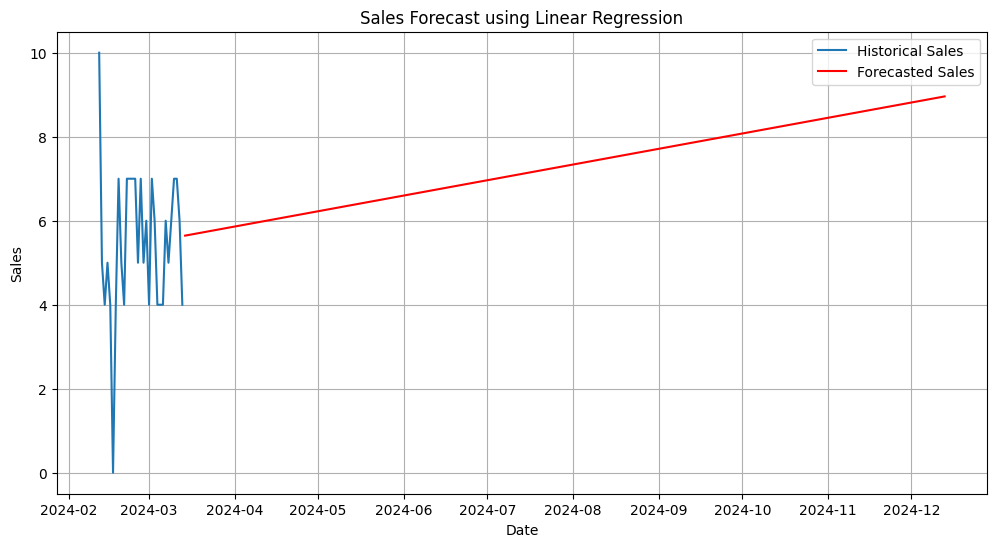

In [ ]:
## Forecasting the performance of the combo for the time period 14 march to 13 april


## Using a simple Linear regression Model

from sklearn.linear_model import LinearRegression
mocha_meltaway['date'] = pd.to_datetime(mocha_meltaway['date'])

mocha_meltaway['date_ordinal'] = mocha_meltaway['date'].map(pd.Timestamp.toordinal)
X = mocha_meltaway[['date_ordinal']]
y = mocha_meltaway['sales']

# Train Linear Regression Model
model = LinearRegression()
model.fit(X, y)

forecast_start = pd.to_datetime('2024-03-14')
forecast_end = pd.to_datetime('2024-12-13')
forecast_dates = pd.date_range(start=forecast_start, end=forecast_end)
forecast_dates_ordinal = forecast_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
forecast = model.predict(forecast_dates_ordinal)

# Prepare forecast DataFrame
df_forecast = pd.DataFrame({
    'date': forecast_dates,
    'forecast': forecast
}).set_index('date')

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(mocha_meltaway['date'], mocha_meltaway['sales'], label='Historical Sales')
plt.plot(df_forecast.index, df_forecast['forecast'], label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast using Linear Regression')
plt.legend()
plt.grid(True)
plt.show()



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequen

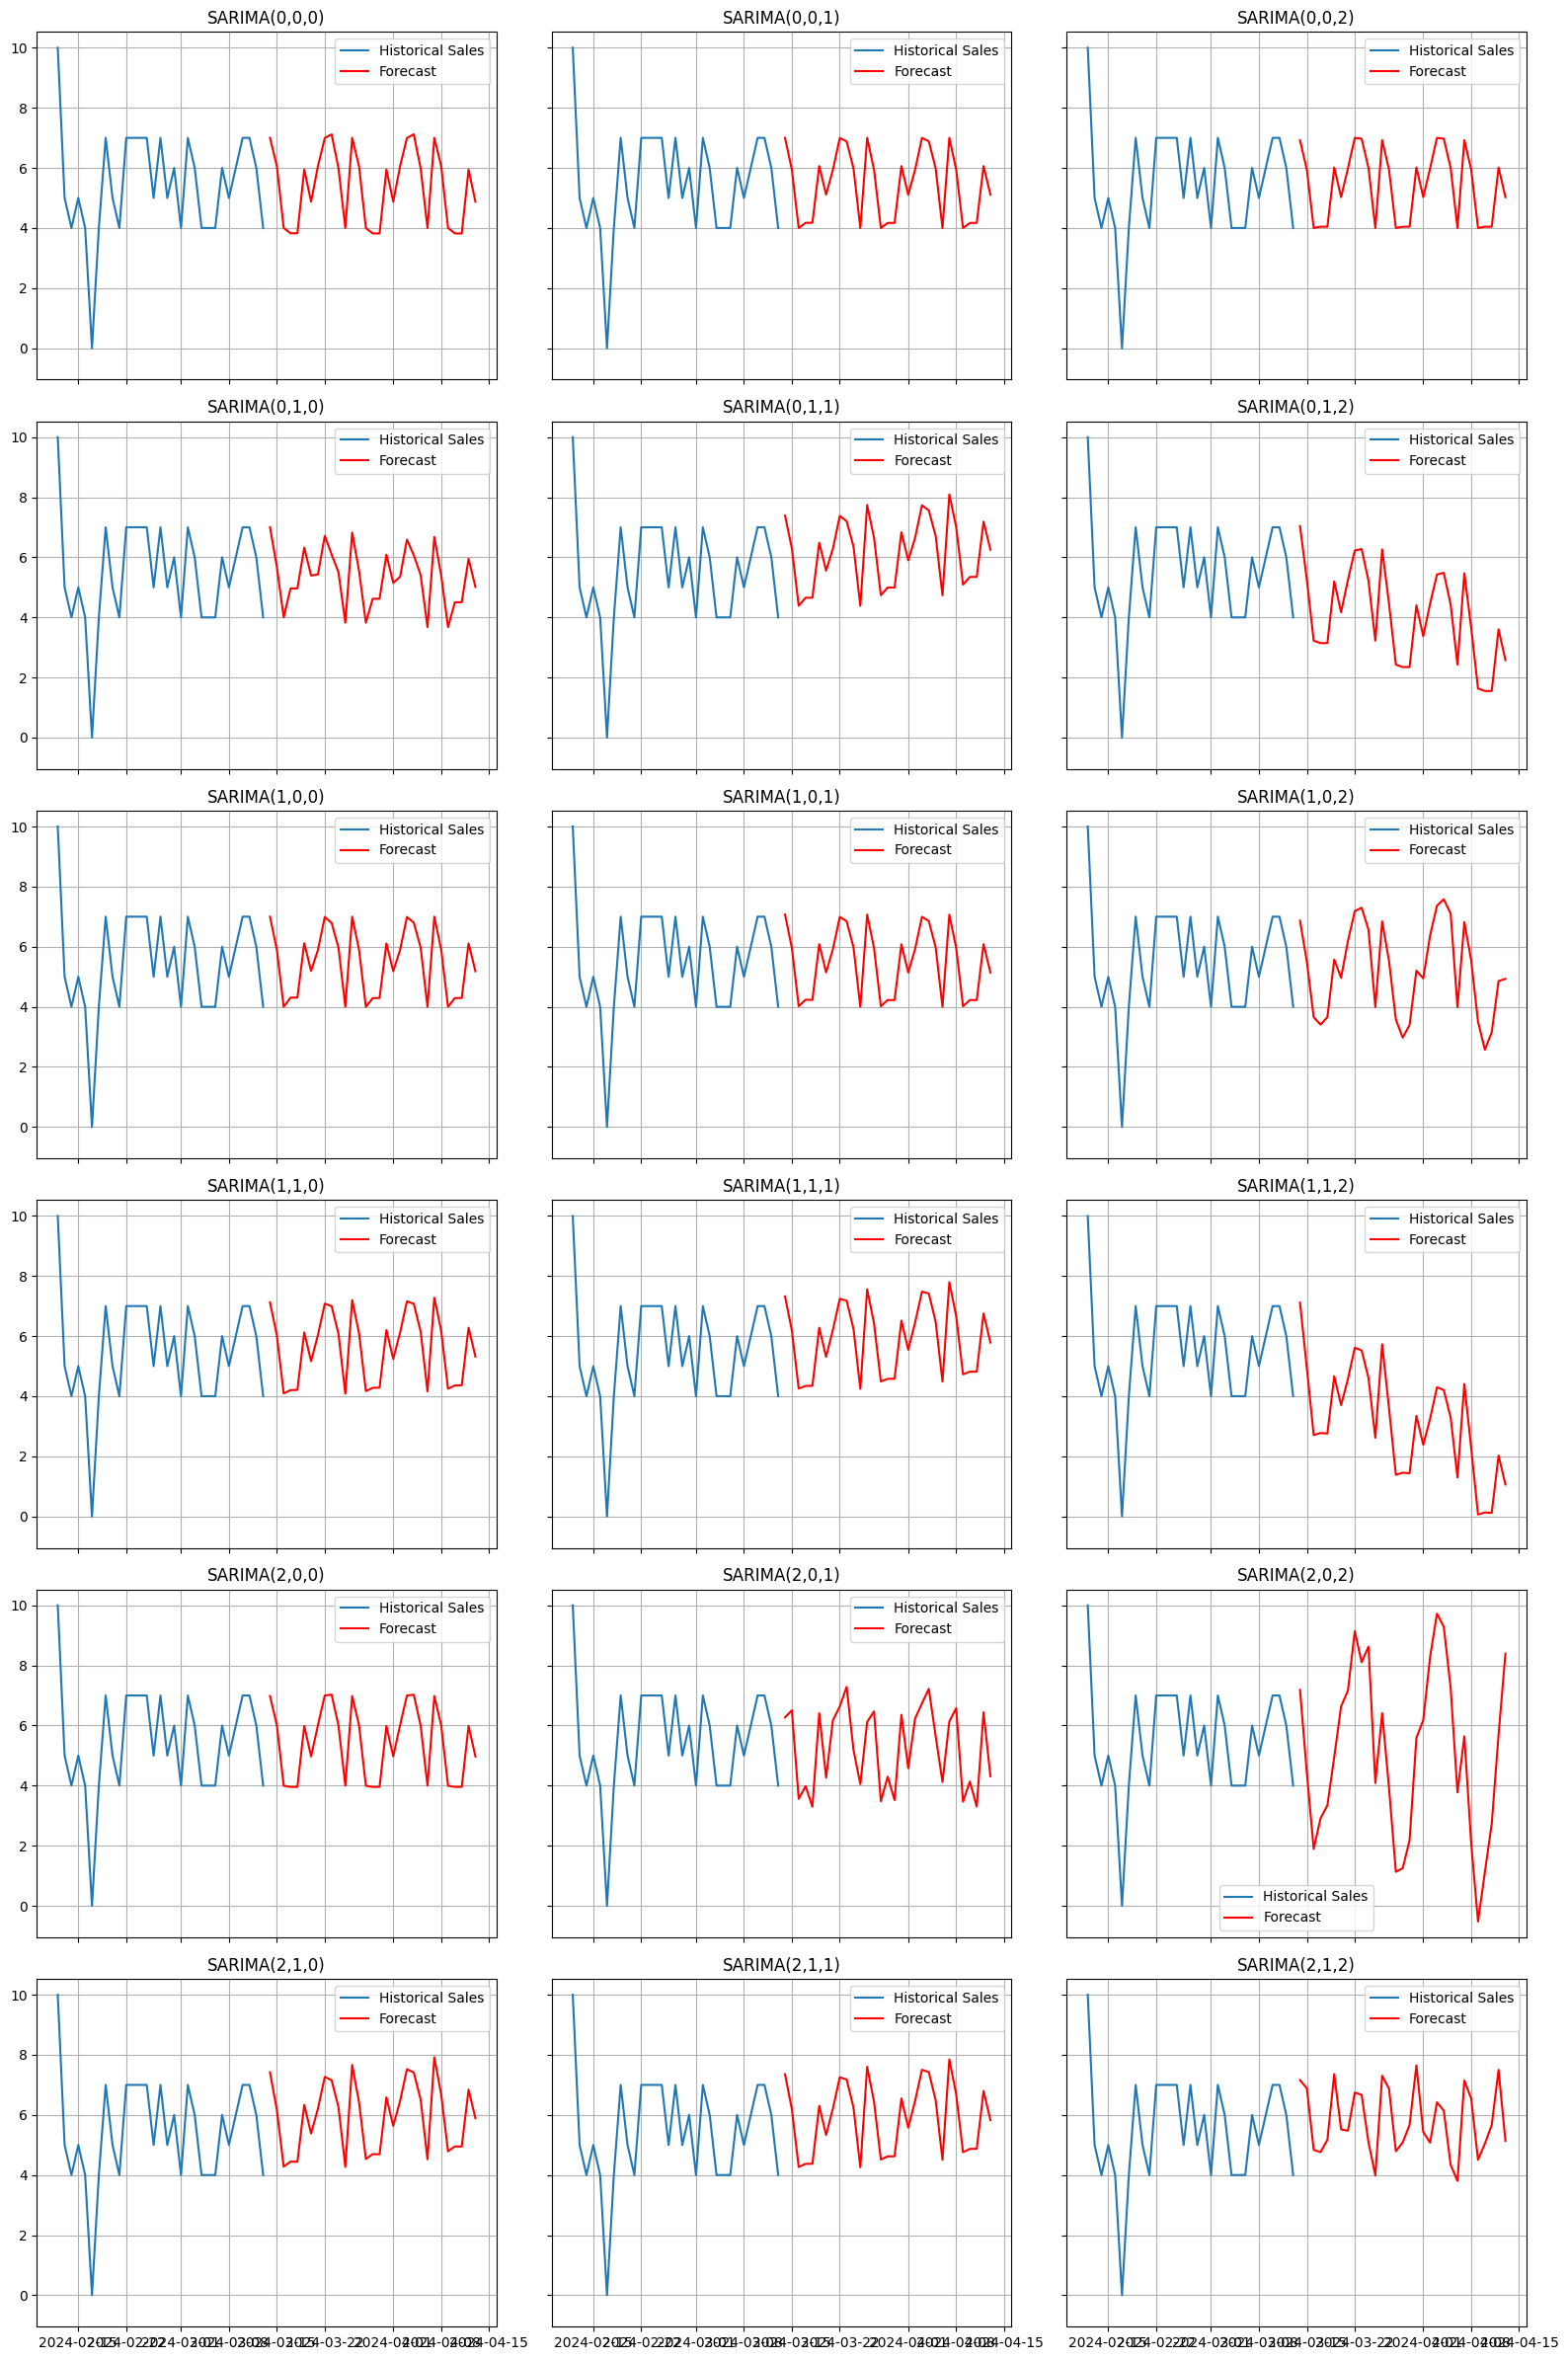

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Ensure the data is prepared as before
mocha_meltaway['date'] = pd.to_datetime(mocha_meltaway['date'])
mocha_meltaway.set_index('date', inplace=True)
mocha_meltaway = mocha_meltaway.sort_index()

sales_data = mocha_meltaway['sales']

# Define parameter grids
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]
seasonal_order = (1, 1, 1, 12)

# Prepare forecast dates
forecast_dates = pd.date_range(start='2024-03-14', end='2024-04-13', freq='D')

# Store results for visualization
results = {}

# Grid search for (p, d, q)
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Fit SARIMA model
                model = SARIMAX(sales_data, order=(p, d, q), seasonal_order=seasonal_order)
                sarima_model = model.fit(disp=False)

                # Forecast
                forecast = sarima_model.get_forecast(steps=len(forecast_dates))
                forecast_mean = forecast.predicted_mean

                # Store results
                results[(p, d, q)] = {
                    'model': sarima_model,
                    'forecast': forecast_mean
                }
            except Exception as e:
                print(f"Error fitting SARIMA({p},{d},{q}): {e}")
                continue

# Visualization
n_rows = len(p_values) * len(d_values)
n_cols = len(q_values)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows), sharex=True, sharey=True)

row = 0
for p in p_values:
    for d in d_values:
        for col, q in enumerate(q_values):
            ax = axes[row, col] if n_rows > 1 else axes[col]
            if (p, d, q) in results:
                result = results[(p, d, q)]
                ax.plot(sales_data, label='Historical Sales')
                ax.plot(forecast_dates, result['forecast'], color='red', label='Forecast')
                ax.set_title(f"SARIMA({p},{d},{q})")
                ax.legend()
                ax.grid(True)
            else:
                ax.set_title(f"SARIMA({p},{d},{q}) - Error")
                ax.axis('off')
        row += 1

plt.tight_layout()
plt.show()


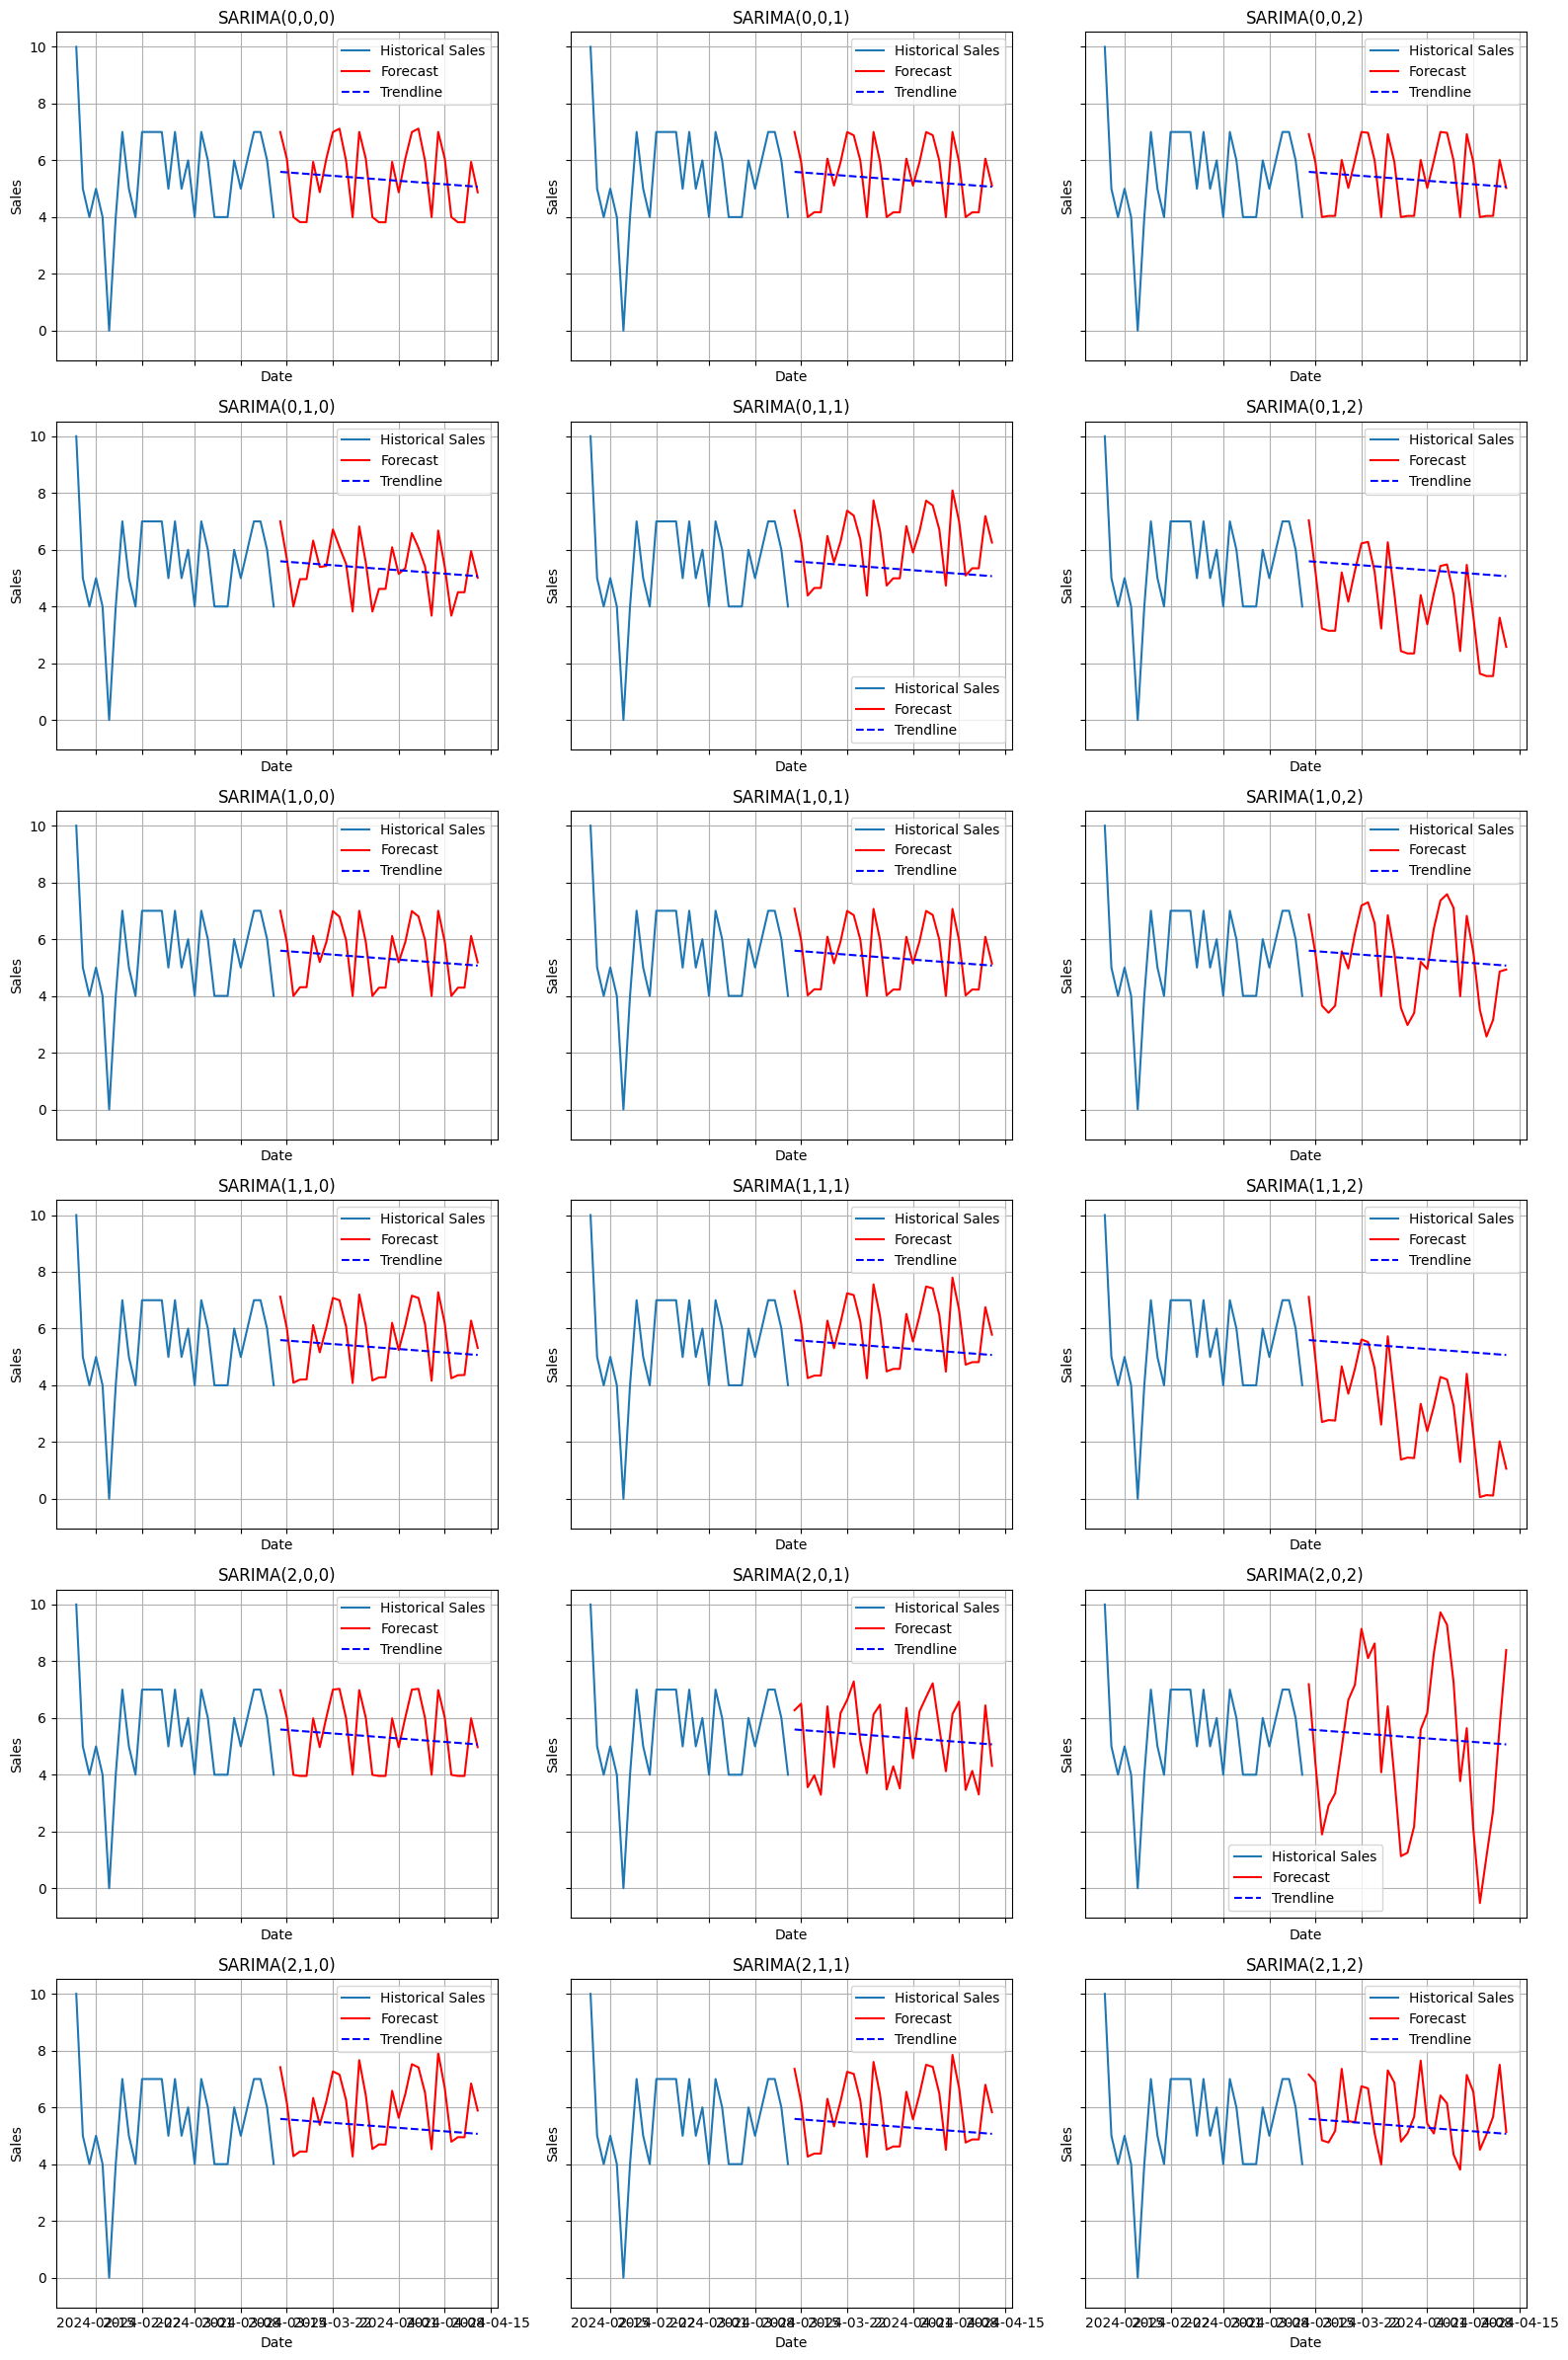

In [ ]:
from numpy.polynomial.polynomial import Polynomial

# Collect forecasted values for all configurations
all_forecasts = pd.DataFrame({(p, d, q): results[(p, d, q)]['forecast']
                              for p, d, q in results.keys()})
# Average the forecasts
average_forecast = all_forecasts.mean(axis=1)

# Fit a polynomial trendline (degree=1 for a straight line)
x = np.arange(len(forecast_dates))
coeffs = Polynomial.fit(x, average_forecast.values, deg=1).convert().coef
trendline = coeffs[0] + coeffs[1] * x  # Linear trend

# Visualization
n_rows = len(p_values) * len(d_values)
n_cols = len(q_values)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows), sharex=True, sharey=True)

row = 0
for p in p_values:
    for d in d_values:
        for col, q in enumerate(q_values):
            ax = axes[row, col] if n_rows > 1 else axes[col]
            if (p, d, q) in results:
                result = results[(p, d, q)]
                ax.plot(sales_data, label='Historical Sales')
                ax.plot(forecast_dates, result['forecast'], color='red', label='Forecast')
                ax.plot(forecast_dates, trendline, color='blue', linestyle='--', label='Trendline')  # Add trendline
                ax.set_title(f"SARIMA({p},{d},{q})")
                ax.legend()
                ax.grid(True)
                ax.set_xlabel('Date')
                ax.set_ylabel('Sales')
            else:
                ax.set_title(f"SARIMA({p},{d},{q}) - Error")
                ax.axis('off')
        row += 1

plt.tight_layout()
plt.show()


In [ ]:
### capuchino(3.75) and sandwich ham and cheese(5.6)
## let us fix the price at 4.75


capucino_orders=orders.loc[(orders['item_name']=='Cappuccino') ]
ham_cheese_orders=orders.loc[(orders['item_name']=='Sandwich Ham&Cheese')]


In [ ]:

df_capucino=capucino_orders
df_hamcheese=ham_cheese_orders


df_capucino['item_size'] = df_capucino['item_size'].replace('Medium', 'Large')
df_capucino['item_price'] = df_capucino['item_price'].replace(3.45,3.75)


<ipython-input-39-58699e756f05>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capucino['item_size'] = df_capucino['item_size'].replace('Medium', 'Large')
<ipython-input-39-58699e756f05>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_capucino['item_price'] = df_capucino['item_price'].replace(3.45,3.75)


In [ ]:
date=['2024-02-12','2024-02-13','2024-02-14','2024-02-15','2024-02-16','2024-02-17']

l3=list(df_capucino['created_at'])
l4=list(df_hamcheese['created_at'])

temp={
    'date':['2024-02-12','2024-02-13','2024-02-14','2024-02-15','2024-02-16','2024-02-17'],
    'sales':[],
    'revenue':[]
}

print(len(l3),len(l4))
for item in date:
  c1,c2=0,0
  for i in range(len(l4)):
    if item in l3[i]:
      c1+=1
    if item in l4[i]:
      c2+=1

  temp['sales'].append(min(c1,c2))
  temp['revenue'].append(min(c1,c2)*4.75)


print(temp)



40 16
{'date': ['2024-02-12', '2024-02-13', '2024-02-14', '2024-02-15', '2024-02-16', '2024-02-17'], 'sales': [3, 3, 1, 0, 0, 0], 'revenue': [14.25, 14.25, 4.75, 0.0, 0.0, 0.0]}


In [ ]:
capcheese=pd.DataFrame(temp)

start_date = datetime(2024, 2, 18)
end_date = datetime(2024, 3, 13)
date_range = pd.date_range(start=start_date, end=end_date)

# Generate random sales values
np.random.seed(0)  # For reproducibility
sales_values = np.random.randint(0,5, size=len(date_range))

# Create DataFrame for new data
df_new_cap = pd.DataFrame({
    'date': date_range,
    'sales': sales_values,
    'revenue': sales_values * 4.75  # Example revenue calculation
})
capcheese=pd.concat([capcheese, df_new_cap], ignore_index=True)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

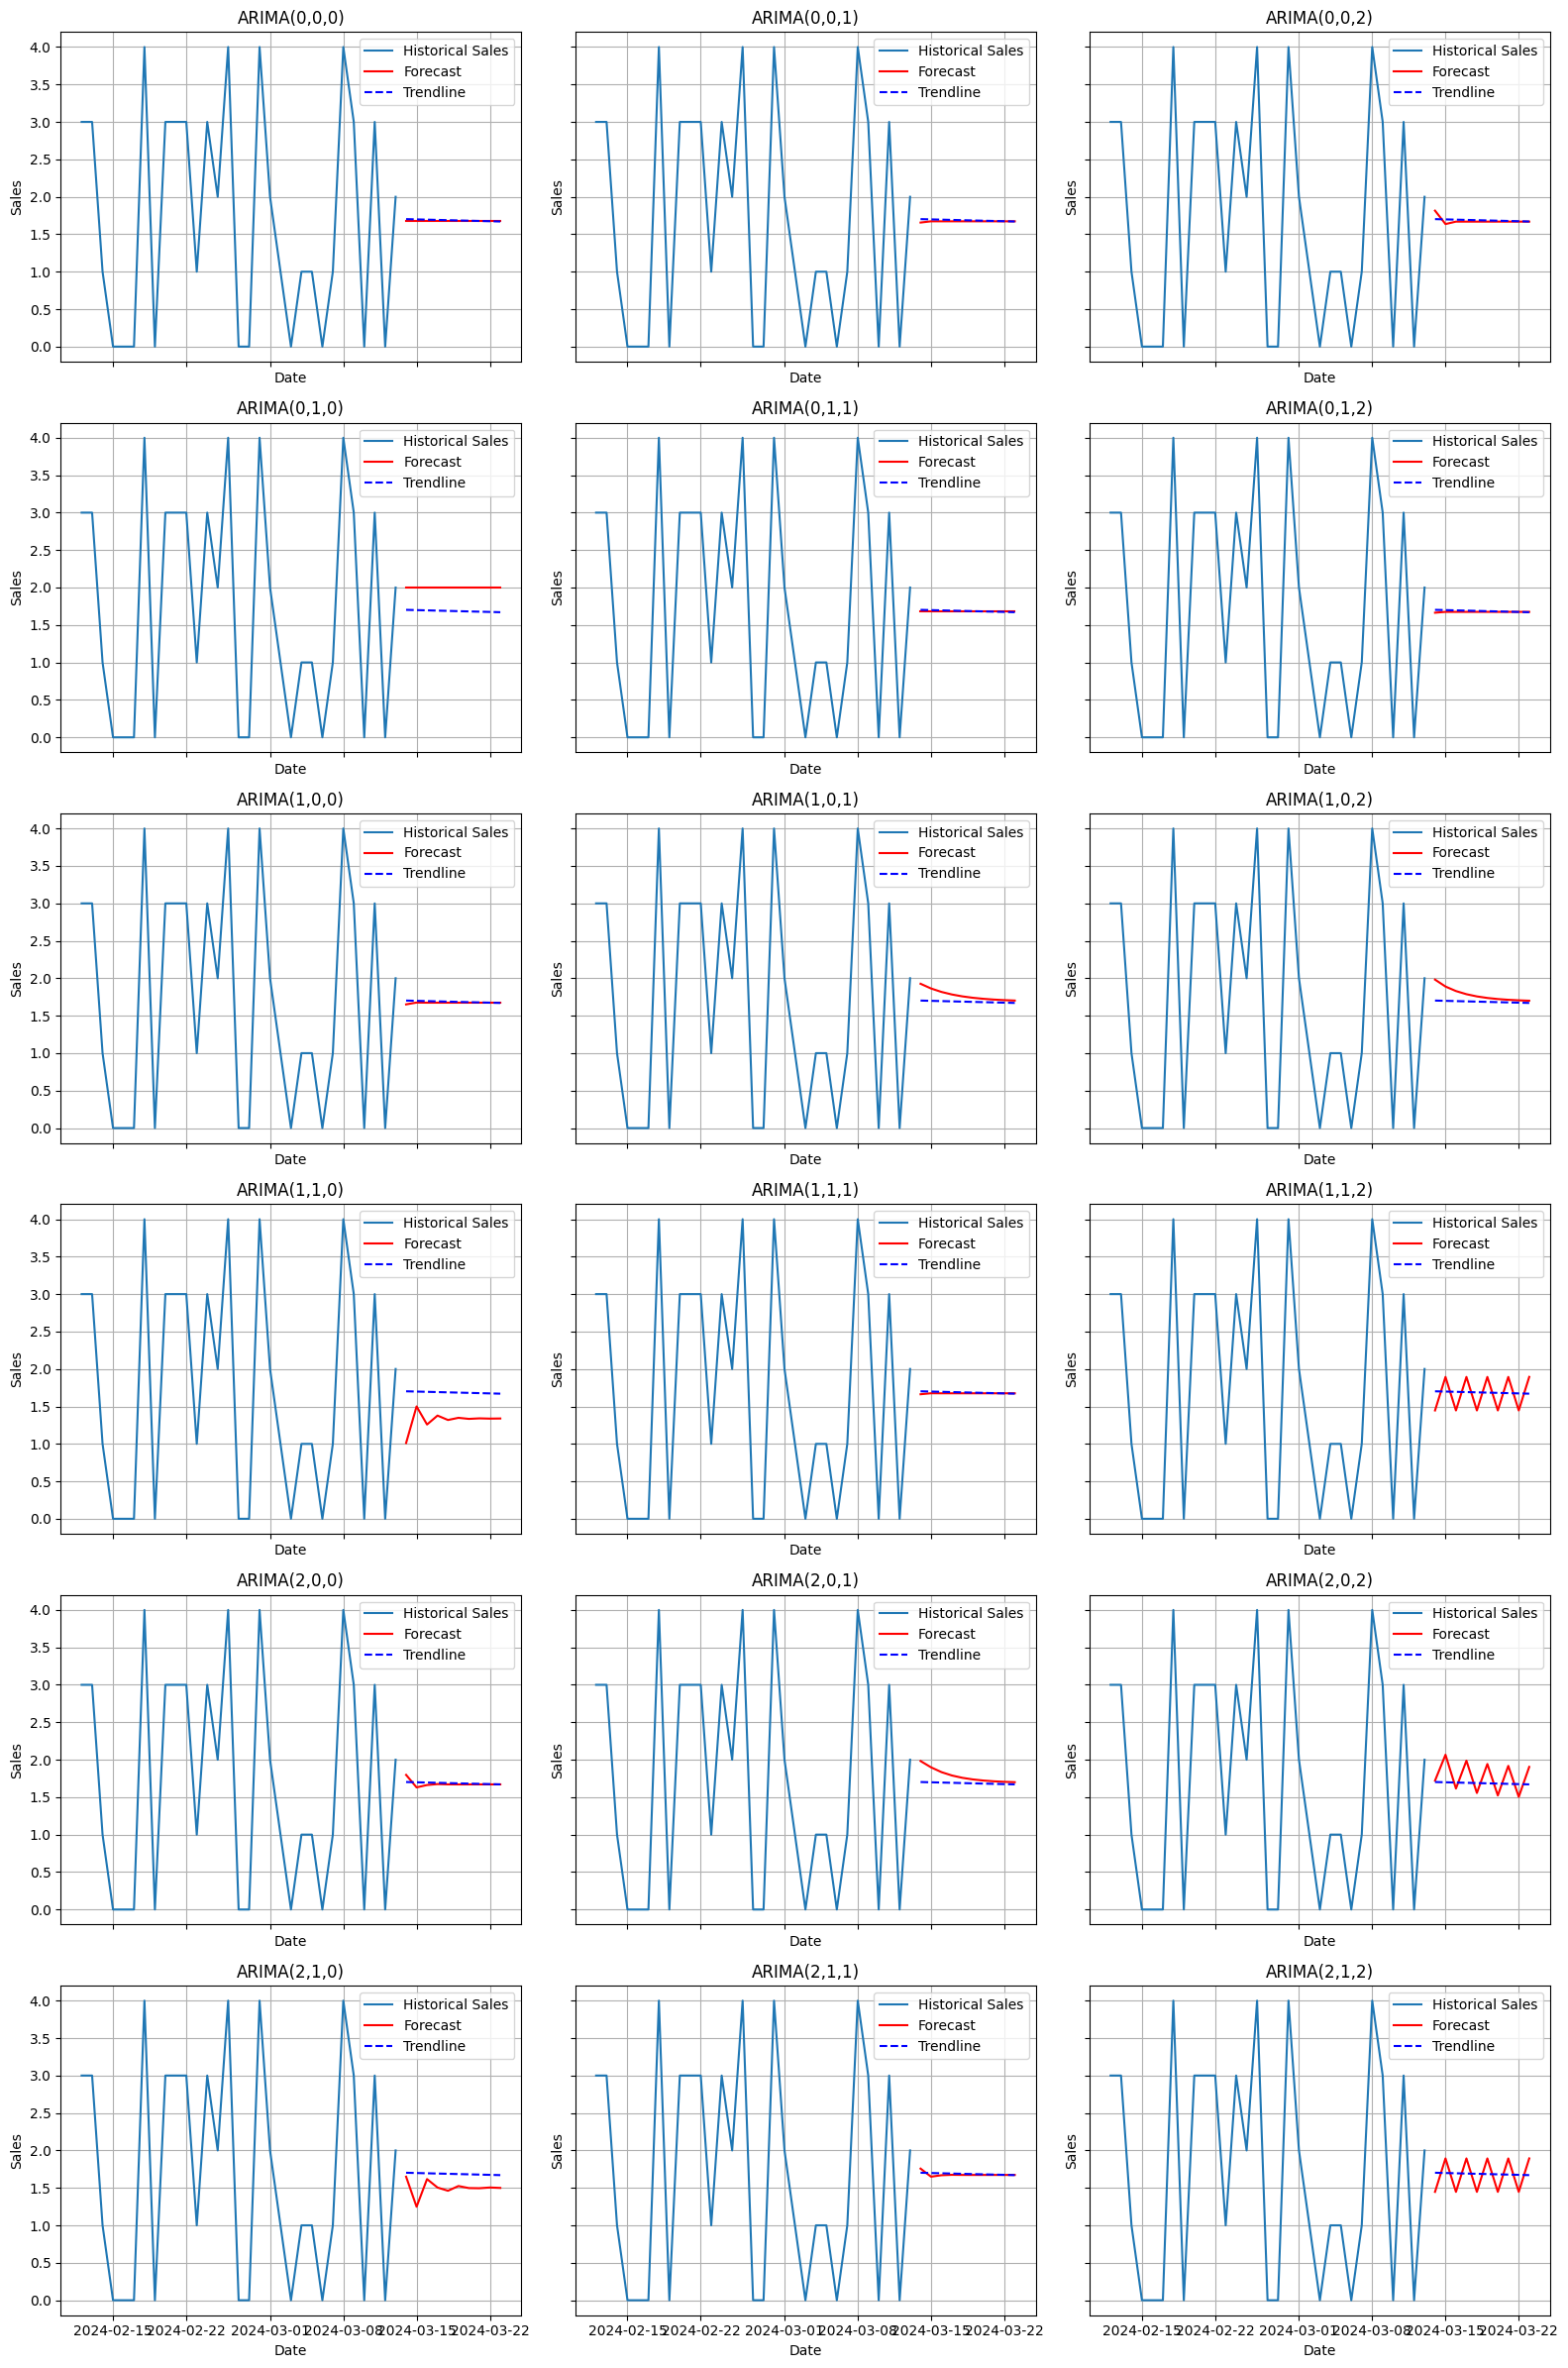

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from numpy.polynomial.polynomial import Polynomial
from itertools import product

# Assuming `capcheese` DataFrame is already prepared with a `sales` column and a `date` index
capcheese['date'] = pd.to_datetime(capcheese['date'])
capcheese.set_index('date', inplace=True)

# Historical sales data
sales_data = capcheese['sales']

# Define p, d, q values
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]

# Date range for forecasts
forecast_dates = pd.date_range(start=sales_data.index[-1] + pd.Timedelta(days=1), periods=10)

# Store results for all configurations
results = {}

for p, d, q in product(p_values, d_values, q_values):
    try:
        # Fit ARIMA model
        model = ARIMA(sales_data, order=(p, d, q))
        model_fit = model.fit()

        # Forecast
        forecast = model_fit.forecast(steps=len(forecast_dates))
        results[(p, d, q)] = {'forecast': forecast, 'model_fit': model_fit}
    except Exception as e:
        print(f"ARIMA({p}, {d}, {q}) failed: {e}")

# Collect forecasts for averaging
all_forecasts = pd.DataFrame({(p, d, q): result['forecast'] for (p, d, q), result in results.items()})
average_forecast = all_forecasts.mean(axis=1)

# Fit a polynomial trendline (degree=1 for a straight line)
x = np.arange(len(forecast_dates))
coeffs = Polynomial.fit(x, average_forecast.values, deg=1).convert().coef
trendline = coeffs[0] + coeffs[1] * x  # Linear trend

# Visualization
n_rows = len(p_values) * len(d_values)
n_cols = len(q_values)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows), sharex=True, sharey=True)

row = 0
for p in p_values:
    for d in d_values:
        for col, q in enumerate(q_values):
            ax = axes[row, col] if n_rows > 1 else axes[col]
            if (p, d, q) in results:
                result = results[(p, d, q)]
                ax.plot(sales_data, label='Historical Sales')
                ax.plot(forecast_dates, result['forecast'], color='red', label='Forecast')
                ax.plot(forecast_dates, trendline, color='blue', linestyle='--', label='Trendline')  # Add trendline
                ax.set_title(f"ARIMA({p},{d},{q})")
                ax.legend()
                ax.grid(True)
                ax.set_xlabel('Date')
                ax.set_ylabel('Sales')
            else:
                ax.set_title(f"ARIMA({p},{d},{q}) - Error")
                ax.axis('off')
        row += 1

plt.tight_layout()
plt.show()


In [ ]:
orders=pd.read_csv('/content/orders.csv')
temp_orders=orders
items=pd.read_csv('/content/items.csv')
ingredients=pd.read_csv('/content/ingredients.csv')
temp_ing=ingredients
inventory=pd.read_csv('/content/inventory.csv')
recipe=pd.read_csv('/content/recipe.csv')
temp_item=items

In [ ]:
temp_ing.describe()

,ing_weight,ing_price
count,18.000000,18.000000
mean,742.722222,9.601111
std,395.874877,7.468106
min,4.000000,1.200000
25%,500.000000,2.375000
50%,1000.000000,8.490000
75%,1000.000000,13.890000
max,1000.000000,27.500000


In [ ]:
temp_item.describe()

,item_price
count,24.000000
mean,3.995833
std,0.767820
min,2.150000
25%,3.450000
50%,3.875000
75%,4.600000
max,5.600000


In [ ]:
temp_item['item_price'].median()

3.875

In [ ]:
temp_ing['ing_price'].median()

8.49